In [1]:
import numpy as np

In [2]:
from FPAR_utils import *

In [3]:
fp = fpar_utils()

In [4]:
fp.read_fpar('data/FPAR_A2016177.hdf')

True

In [5]:
fp.qc

array([[  1,   1,   1, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [6]:
convert_binary(255)

'11111111'

In [5]:
new_cloud = np.zeros(fp.qc.shape)

In [6]:
for i in range(new_cloud.shape[0]):
    for j in range(new_cloud.shape[1]):
        new_cloud[i,j] = convert_binary(fp._laiqc[i,j]) == '00000000'

In [8]:
unique, count = np.unique(new_cloud,return_counts = True)

In [9]:
unique

array([ 0.,  1.])

In [10]:
count

array([30914157,  6399153], dtype=int64)

Text(0.5,1,'qc_strong filter')

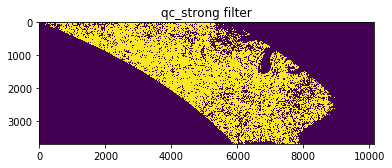

In [16]:
plt.imshow(qc_cloud)
plt.title('qc_strong filter')

In [7]:
qc_cloud = np.zeros(fp.qc.shape)


In [8]:
for i in range(qc_cloud.shape[0]):
    for j in range(qc_cloud.shape[1]):
        qc_cloud[i,j] = convert_binary(fp.qc[i,j])[1:] == '0000000' or convert_binary(fp.qc[i,j])[1:] == '0001000'

In [9]:
print(fp.coords_to_ind(37, -87))
print(fp.coords_to_ind(37, -91))
print(fp.coords_to_ind(42, -87))
print(fp.coords_to_ind(42, -91))

(2390, 6886)
(2390, 6150)
(1471, 6886)
(1471, 6150)


In [10]:
cur_fpar = fp.fpar[1471:2390, 6150:6886]
cur_qc_extra = qc_cloud[1471:2390, 6150:6886]
cur_qc_lai = new_cloud[1471:2390, 6150:6886]

Text(0.5,1,'fpar with qc lai filter')

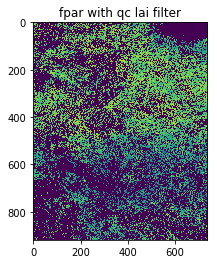

In [28]:
plt.imshow(cur_fpar*cur_qc_lai)
plt.title('fpar with qc lai filter')

Text(0.5,1,'fpar with qc extra filter')

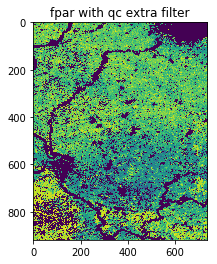

In [22]:
plt.imshow(cur_fpar*cur_qc_extra)
plt.title('fpar with qc extra filter')

In [28]:
import matplotlib.pyplot as plt

Text(0.5,1,'fpar with both filters')

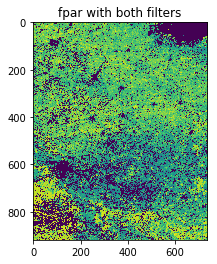

In [44]:
plt.imshow(cur_fpar*cur_qc_extra*cur_qc_lai)
plt.title('fpar with both filters')

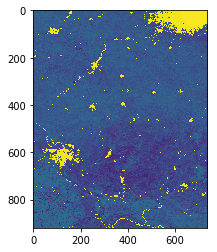

In [40]:
plt.imshow(cur_fpar)

In [47]:
cur_fpar.shape

(919, 736)

In [48]:
unique, counts = np.unique(fp.fpar, return_counts= True)

In [49]:
unique, counts

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 250, 253, 254, 255], dtype=uint8),
 array([      51,      344,      518,      414,      324,     1059,
            9080,      400,      647,     1062,     3577,     6721,
           17928,    37248,    14977,    11830,    21935,    13365,
           19184,    23158,    19961,    32184,    24023,    63808,
          135966,   114212,    76303,    60075,    67416,    64618,
           71493,    81275,    57242,   120064,   117243

In [11]:
from mpl_toolkits.basemap import Basemap, cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

C:\Users\Bowen\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3683: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\Bowen\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3719: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]
C:\Users\Bowen\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3752: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


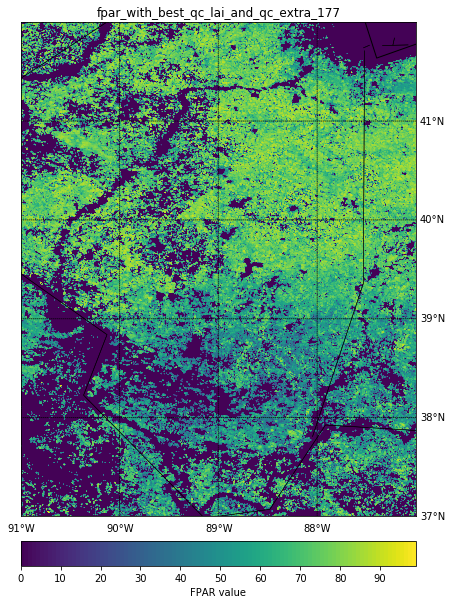

In [14]:
plt.figure(figsize=(10,10))
m = Basemap(llcrnrlon=-91,llcrnrlat=37,urcrnrlon=-87.,urcrnrlat=42.)
m.drawcoastlines()
m.drawstates()

# print(map.llcrnrx)
xx, yy = m.makegrid(736, 919)

clevs = np.arange(100)
m.contourf(xx,yy,data,clevs)
m.drawparallels(np.arange(37, 42, 1), labels=[0,1,1,0])
m.drawmeridians(np.arange(-91, -87, 1), labels=[1,0,0,1])
cbar = m.colorbar(location='bottom',pad="5%")
cbar.set_label('FPAR value')
plt.title('fpar_with_best_qc_lai_and_qc_extra_177')
plt.show()

In [12]:
flip_mat = np.zeros((919, 919))
for i in range(919):
    flip_mat[i, 918-i] = 1

In [13]:
data = flip_mat@(cur_fpar*cur_qc_lai*cur_qc_extra)

In [61]:
mat = np.array([[1,2,3],[3,4,5],[5,6,7]])

In [65]:
flip_mat@mat

array([[ 5.,  6.,  7.],
       [ 3.,  4.,  5.],
       [ 1.,  2.,  3.]])

In [70]:
np.arange(37, 42, 7)

array([37])

In [29]:
memory.clear()

NameError: name 'memory' is not defined

In [30]:
import gc
gc.collect()

1607

In [34]:
# import objgraph
import random
import inspect

class Foo(object):
    def __init__(self):
        self.val = None

    def __str__(self):
        return "foo - val: {0}".format(self.val)

def f():
    l = []
    for i in range(3):
        foo = Foo()
       #print "id of foo: {0}".format(id(foo))
       #print "foo is: {0}".format(foo)
        l.append(foo)

    return l

def main():

    d = {}
    l = f()

    d['k'] = l

    print ("list l has {0} objects of type Foo()".format(len(l)))
#     objgraph.show_most_common_types()

#     objgraph.show_backrefs(random.choice(objgraph.by_type('Foo')),
#                            filename="foo_refs.png"
#                        )

#     objgraph.show_refs(d, filename='sample-graph.png')

In [35]:
main()

list l has 3 objects of type Foo()
